# Map Moment Tensors to Events 
1. Unpickle events, stations, bounding box, and shape-file
1. Read moment tensor CSV file
1. Map (attach) moment tensors to events
1. Plot overlay of moment tenosrs on the Groningen Field 

#### 1. Unpickle events, station, bound box, and shape-file

In [1]:
import pickle
from gnam.events.gevents import gevents as gevents
from gnam.events.gstations import gstations as gstations
from gnam.events.munge.knmi import correct_station_depths as csd_f
import shapefile as sf

#Unpickle events
print('Unpickling Events')
f = open('../pickled/events.pickle', 'rb')
dill_events = pickle.load(f)
f.close()
    

#Unpickle stations
print('Unpickling Station Traces')
f = open('../pickled/straces.pickle', 'rb')
dill_straces = pickle.load(f)
f.close()
# This is kind of hokey, but it works for now.
# Some of the stations depths do not follow the 
# 50, 100, 150, 200 meter depths -- possibly because
# the boreholes are slanted. To correct for this,
# a hard coded "patch/update" is applied. See the
# code for details and update values.
dill_straces.correct_stations(csd_f)


#Unpickle bounding box
print('Unpickling Bounding Box')
f = open('../pickled/model_bbox.pickle', 'rb')
gf_bbox = pickle.load(f)
f.close()


#Unpickle groningen shape-file
print('Unpickling Groningen Shape-File')
mysf = sf.Reader('../data/GroningenFieldShapeFile/Groningen_field')
    
print('Done')

Unpickling Events
Unpickling Station Traces
Unpickling Bounding Box
Unpickling Groningen Shape-File
Done


#### 2. Read moment tensor CSV file

In [2]:
from gnam.events.mtensors import mtensors
import pandas as pd
import numpy as np

gf_mts = mtensors('../data/event_moments.csv')
gf_df = gf_mts.get_df()
print('Moment Tensor DataFrame:\n',gf_df)
print()

print('Moment Tensors:')
for imt in range(len(gf_mts)):
    print('Tensor[%d]:' %(imt))
    print(gf_mts[imt])

Moment Tensor DataFrame:
           Date   ML  Latitude  Longitude    X-rd    Y-rd  Depth  Depth +/-  \
nr                                                                           
1   2016-02-25  2.4   53.1819     6.7814  248203  578149   3040         43   
2   2016-09-02  2.1   53.2201     6.8411  252108  582478   2905        103   
3   2016-11-01  2.2   53.2978     6.8045  249493  591076   3000         32   
4   2017-03-11  2.1   53.3418     6.7576  246274  595912   3023         24   
5   2017-04-26  2.0   53.2100     6.7126  243547  581189   3286          7   
6   2017-05-27  2.6   53.2092     6.8331  251598  581255   2935         78   
7   2017-12-10  2.1   53.3622     6.7666  246829  598193   2984         47   
8   2018-01-08  3.4   53.3573     6.7517  245848  597629   3030         89   
9   2018-02-08  2.0   53.3359     6.7472  245593  595242   2947         20   
10  2018-02-11  2.2   53.2947     6.7786  247773  590697   3004         24   
11  2018-04-13  2.8   53.3635     6.74

#### 3. Map (attach) moment tensors to events

In [3]:
# get event catalog of the events withing the bounding box
e_cat = dill_events.getIncCatalog()


# This is a bit hokey, but it works. Here we update the
# event time from the moment tensor CSV file with thouse
# from the event catalog
gf_mts.update_utcdatetime(e_cat)


# Create a dictionary that maps moment tensors to events
e2mt_dict = gf_mts.map_events_2_tensors(e_cat)
e2mt_keys = e2mt_dict.keys()

# Print a comparison of events to moment tensors
for key in e2mt_keys:
    print('UTC: event[%d][Date] = %s' %(key,e_cat[key].origins[0].time))
    print('UTC:    MT[%d][Date] = %s' %(key,e2mt_dict[key]['Date']))
    print('Mag: event[%d][Date] = %s' %(key,e_cat[key].magnitudes[0].mag))
    print('Mag:    MT[%d][Date] = %s' %(key,e2mt_dict[key]['ML']))
    print()

UTC: event[15][Date] = 2016-02-25T22:26:30.899999Z
UTC:    MT[15][Date] = 2016-02-25T22:26:30.899999Z
Mag: event[15][Date] = 2.420941255
Mag:    MT[15][Date] = 2.4

UTC: event[14][Date] = 2016-09-02T13:16:00.900000Z
UTC:    MT[14][Date] = 2016-09-02T13:16:00.900000Z
Mag: event[14][Date] = 2.066445551
Mag:    MT[14][Date] = 2.1

UTC: event[13][Date] = 2016-11-01T00:57:46.000000Z
UTC:    MT[13][Date] = 2016-11-01T00:57:46.000000Z
Mag: event[13][Date] = 2.180530746
Mag:    MT[13][Date] = 2.2

UTC: event[12][Date] = 2017-03-11T12:52:48.000000Z
UTC:    MT[12][Date] = 2017-03-11T12:52:48.000000Z
Mag: event[12][Date] = 2.083340996
Mag:    MT[12][Date] = 2.1

UTC: event[11][Date] = 2017-04-26T13:56:49.299999Z
UTC:    MT[11][Date] = 2017-04-26T13:56:49.299999Z
Mag: event[11][Date] = 2.005890463
Mag:    MT[11][Date] = 2.0

UTC: event[10][Date] = 2017-05-27T15:29:00.600000Z
UTC:    MT[10][Date] = 2017-05-27T15:29:00.600000Z
Mag: event[10][Date] = 2.585955131
Mag:    MT[10][Date] = 2.6

UTC: event

#### 4. Plot overlay of moment tenosrs on the Groningen Field 

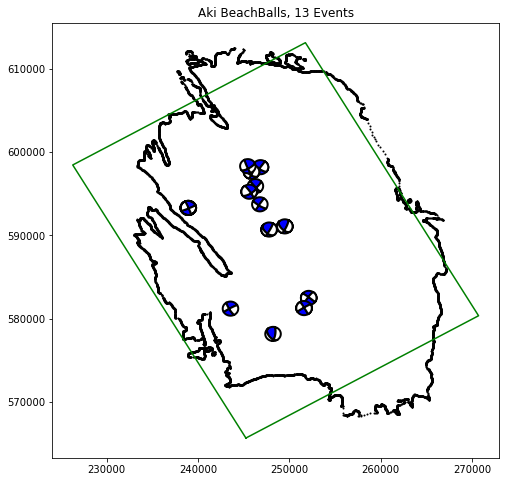

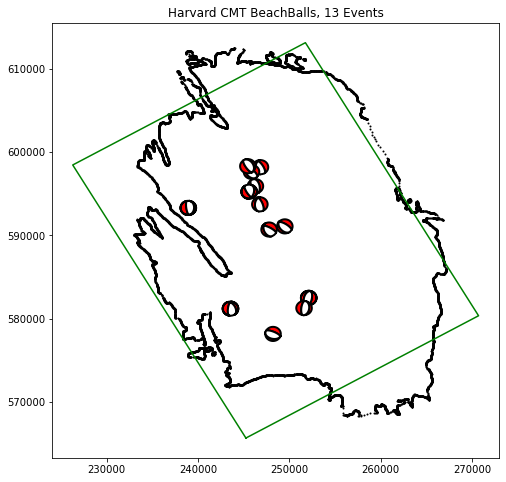

In [4]:
import matplotlib.pyplot as plt 

#get coordinates for the Shape-File
s = mysf.shape(0)
shape_xy = np.asarray(s.points)

#get beachballs for the moment tensors
aki_bballs = gf_mts.get_aki_beachballs(diam=1700)
cmt_bballs = gf_mts.get_cmt_beachballs(diam=1700,fc='red')

#get coordinates for the moment tensors
aki_xc = gf_mts.get_xcoords()


#Plot shape-file, bounding box, and Aki Beachballs
fig, ax = plt.subplots(1,figsize=(8,8))
ax.scatter(shape_xy[:,0],shape_xy[:,1],s=1,c='black',zorder=0)
ax.plot(gf_bbox.getCLoop()[:,0],gf_bbox.getCLoop()[:,1],c='green',zorder=1)
for bb in aki_bballs: # add the beachballs
    ax.add_collection(bb)
ax.set_title('Aki BeachBalls, %d Events' %(len(aki_bballs)))

#Plot shape-file, bounding box, and Harvard CMT Beachballs
fig1, ax1 = plt.subplots(1,figsize=(8,8))
ax1.scatter(shape_xy[:,0],shape_xy[:,1],s=1,c='black',zorder=0)
ax1.plot(gf_bbox.getCLoop()[:,0],gf_bbox.getCLoop()[:,1],c='green',zorder=1)
for bb in cmt_bballs:
    ax1.add_collection(bb)
ax1.set_title('Harvard CMT BeachBalls, %d Events' %(len(cmt_bballs)))

plt.show()

## Finished